In [78]:
import json
import pandas as pd
import scipy as sp

study_id = "MGYS00005628"

data = pd.read_table(f"data/mgnify_data/{study_id}__ERP005534_GO_abundances_v5.0.tsv", sep="\t", header=0, index_col=[0,1,2])
data = data.droplevel(["GO", "category"])
data = data.T
display(data.head())

with open(f"data/mgnify_data/{study_id}_metadata.json") as f:
    metadata = json.load(f)

metadata = pd.DataFrame(metadata["metadata"])
metadata = metadata.loc["Health state__elixir"]
metadata = metadata.to_frame().T
display(metadata.head())
print(metadata.T.value_counts(dropna=False))
print(len(metadata.T))



description,mitochondrion inheritance,mitochondrial genome maintenance,vacuole inheritance,single strand break repair,phosphopyruvate hydratase complex,mannosyltransferase activity,transition metal ion transport,autophagosome assembly,tRNA binding,fatty-acyl-CoA binding,...,Lys48-specific deubiquitinase activity,queuosine salvage,acetolactate synthase regulator activity,CST complex,ribonucleoprotein complex,drug transmembrane export,positive regulation of stomatal complex development,negative regulation of microtubule motor activity,starch binding,regulation of store-operated calcium entry
ERR478960,0,0,0,0,6,0,1,0,48,0,...,0,0,2,0,0,0,0,0,2,0
ERR478970,0,0,0,0,8,2,4,0,70,0,...,0,11,3,0,0,0,0,0,7,0
ERR478980,0,0,0,0,1,0,0,0,12,0,...,0,1,1,0,0,0,0,0,0,0
ERR478990,0,0,0,0,4,0,1,0,52,0,...,0,5,5,0,1,0,0,0,2,0
ERR478961,0,0,0,0,4,0,1,0,61,0,...,0,2,1,0,0,0,0,0,2,0


,ERS436836,ERS436735,ERS436823,ERS436725,ERS436833,ERS436767,ERS436831,ERS436763,ERS436733,ERS436681,...,ERS581038,ERS581044,ERS581047,ERS436757,ERS433421,ERS433485,ERS433490,ERS581054,ERS433501,ERS581033
Health state__elixir,Diseased,Healthy,Diseased,Diseased,Diseased,Healthy,Diseased,Diseased,Diseased,Diseased,...,NaN,NaN,NaN,Diseased,NaN,NaN,NaN,NaN,NaN,NaN


Health state__elixir
NaN                     225
Diseased                136
Healthy                  63
Name: count, dtype: int64
424


combined the datasets and filter to keep only the ones with the useful label

In [79]:
%load_ext autoreload
%autoreload 2
import mgnify_helper_functions as mhf

mgnify = mhf.MGnifyData(cache_folder="data/mgnify_data")
assembly_id_to_sample_id = mgnify.get_run_id_to_sample_id_dict(study_id)

column_mapper = {}
for key, value in assembly_id_to_sample_id.items():
    if value not in column_mapper:
        column_mapper[value] = []
    column_mapper[value].append(key)

new_columns = {new_name: metadata[old_name] for old_name, new_names in column_mapper.items() for new_name in new_names}
metadata = metadata.drop(columns=list(column_mapper.keys()))
metadata = metadata.join(pd.DataFrame(new_columns))
metadata = metadata.dropna(axis=1, how="all")
metadata = metadata.T
display(metadata)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Health state__elixir
ERS436810,Diseased
ERS436709,Diseased
ERS436644,Healthy
ERS436741,Diseased
ERS436720,Diseased
...,...
ERR479505,Diseased
ERR479503,Diseased
ERR479502,Diseased
ERR479501,Diseased


In [80]:
print("data points: ", len(data))
print("metadata points: ", len(metadata))

print(metadata.value_counts())

combined_data = data.join(metadata, how="inner") # outer or left or inner? Which one do we want

print("combined data points: ", len(combined_data))
display(combined_data.head())

data points:  644
metadata points:  535
Health state__elixir
Diseased                337
Healthy                 198
Name: count, dtype: int64
combined data points:  525


,mitochondrion inheritance,mitochondrial genome maintenance,vacuole inheritance,single strand break repair,phosphopyruvate hydratase complex,mannosyltransferase activity,transition metal ion transport,autophagosome assembly,tRNA binding,fatty-acyl-CoA binding,...,queuosine salvage,acetolactate synthase regulator activity,CST complex,ribonucleoprotein complex,drug transmembrane export,positive regulation of stomatal complex development,negative regulation of microtubule motor activity,starch binding,regulation of store-operated calcium entry,Health state__elixir
ERR478970,0,0,0,0,8,2,4,0,70,0,...,11,3,0,0,0,0,0,7,0,Healthy
ERR478980,0,0,0,0,1,0,0,0,12,0,...,1,1,0,0,0,0,0,0,0,Healthy
ERR478990,0,0,0,0,4,0,1,0,52,0,...,5,5,0,1,0,0,0,2,0,Healthy
ERR478961,0,0,0,0,4,0,1,0,61,0,...,2,1,0,0,0,0,0,2,0,Healthy
ERR478971,0,0,0,0,6,1,3,0,72,1,...,6,1,0,0,0,0,0,3,0,Healthy


<font color="red">We need to be careful, as many samples have multiple runs. value_count on metadata only, shows in total 136+63 samples with Health state available. It is much more here.</font>

##### Outlier detection

In [81]:
from scipy import stats
import numpy as np

data.describe()

outliers = (np.abs(stats.zscore(data)) < 3).all(axis=1)
print(outliers.sum())

221


<font color="red">I guess this is kind of expected? A lot of zeros for some features namely</font>

### Split data

In [82]:
from sklearn.model_selection import train_test_split

X, y = combined_data.drop(columns="Health state__elixir"), combined_data["Health state__elixir"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### batch-effect correction

### Imputation

### Normalize

In [83]:
from sklearn.preprocessing import normalize

X_train = pd.DataFrame(normalize(X_train, norm="l1"), index=X_train.index, columns=X_train.columns)
display(X_train.describe())


,mitochondrion inheritance,mitochondrial genome maintenance,vacuole inheritance,single strand break repair,phosphopyruvate hydratase complex,mannosyltransferase activity,transition metal ion transport,autophagosome assembly,tRNA binding,fatty-acyl-CoA binding,...,Lys48-specific deubiquitinase activity,queuosine salvage,acetolactate synthase regulator activity,CST complex,ribonucleoprotein complex,drug transmembrane export,positive regulation of stomatal complex development,negative regulation of microtubule motor activity,starch binding,regulation of store-operated calcium entry
count,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,420.000000,420.000000,420.000000,4.200000e+02,420.000000,4.200000e+02,...,4.200000e+02,420.000000,420.000000,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,4.200000e+02,420.000000,4.200000e+02
mean,4.681948e-07,2.000039e-07,1.345502e-07,8.983483e-08,0.000090,0.000013,0.000048,4.783950e-08,0.001319,3.355948e-06,...,3.349688e-08,0.000098,0.000036,4.563361e-08,1.037341e-07,5.899877e-07,1.127393e-08,2.811423e-08,0.000063,5.263483e-09
std,3.942538e-06,1.676317e-06,9.447308e-07,1.618762e-06,0.000053,0.000032,0.000047,5.798232e-07,0.000287,1.062718e-05,...,3.334997e-07,0.000055,0.000035,5.493145e-07,1.111035e-06,3.028142e-06,2.310468e-07,2.673533e-07,0.000049,1.078693e-07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000425,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000064,0.000000,0.000020,0.000000e+00,0.001183,0.000000e+00,...,0.000000e+00,0.000066,0.000016,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000029,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000084,0.000004,0.000039,0.000000e+00,0.001299,0.000000e+00,...,0.000000e+00,0.000096,0.000030,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000053,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000109,0.000013,0.000065,0.000000e+00,0.001422,6.519251e-07,...,0.000000e+00,0.000124,0.000049,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000089,0.000000e+00
max,6.384473e-05,2.040289e-05,1.051331e-05,3.300984e-05,0.000428,0.000374,0.000428,8.121867e-06,0.004587,9.809692e-05,...,4.873120e-06,0.000428,0.000286,1.040420e-05,2.127660e-05,3.498828e-05,4.735050e-06,3.248747e-06,0.000321,2.210663e-06


### Model fitting

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### evaluation

In [ ]:
from sklearn.metrics import classification_report

X_test = pd.DataFrame(normalize(X_test, norm="l1"), index=X_test.index, columns=X_test.columns)
y_test = le.transform(y_test)
predictions = clf.predict(X_test)


In [ ]:
print(classification_report(y_test, predictions)

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        65
           1       0.86      0.47      0.61        40

    accuracy                           0.77       105
   macro avg       0.81      0.71      0.73       105
weighted avg       0.79      0.77      0.75       105



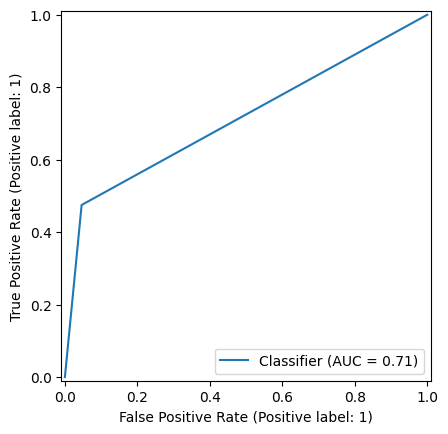

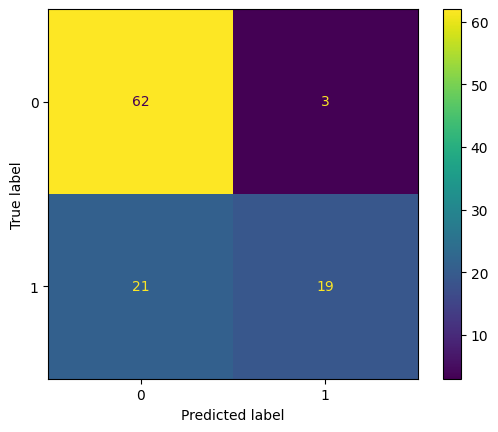

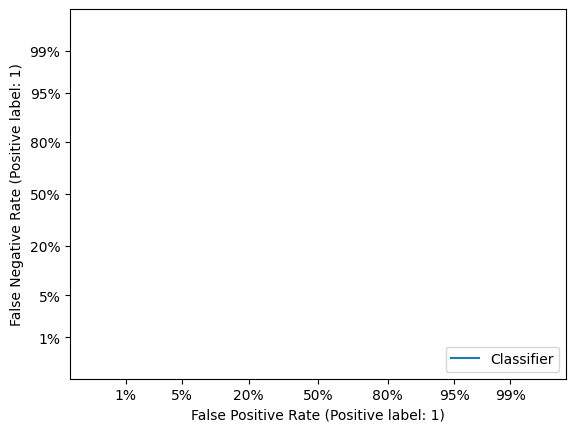

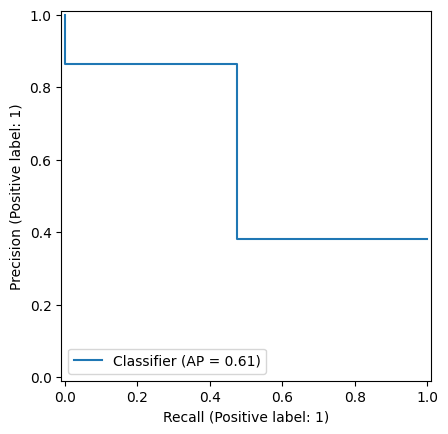

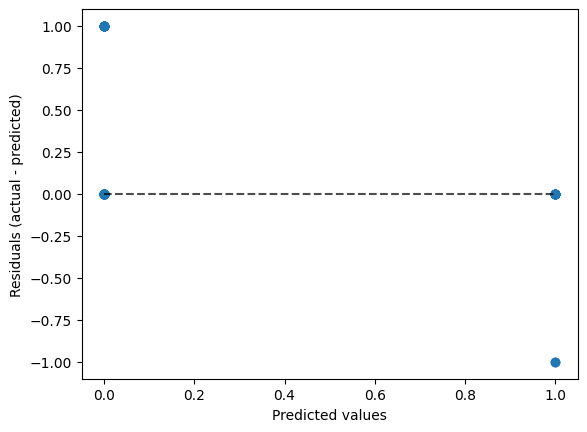

In [90]:
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, DetCurveDisplay, PrecisionRecallDisplay, PredictionErrorDisplay

RocCurveDisplay.from_predictions(y_test, predictions)
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
DetCurveDisplay.from_predictions(y_test, predictions)
PrecisionRecallDisplay.from_predictions(y_test, predictions)
PredictionErrorDisplay.from_predictions(y_test, predictions)
